# Import

In [17]:
import numpy as np
import pandas as pd
import sys
import os

from path import Path

import importlib
import matplotlib
import matplotlib.pyplot as plt

# Dataset

In [18]:
# Загрузка данных 

def get_train():
    df = pd.read_csv("./Data/waterflood-master/waterflood-master/data/train/train_data.csv")
    df['MEASURED_IN_DATE'] = pd.to_datetime(df['MEASURED_IN_DATE'])
    df['MEASURED_IN'] = pd.to_datetime(df['MEASURED_IN'])
    df['KCHARWORK'] = df['KCHARWORK'].astype(int).astype('object')
    print(df.shape)
    print(df["WELL_NAME"].nunique())
    return df

df = get_train()

display(df.head())

display(df.info())

(177575, 11)
266


,MEASURED_IN_DATE,WELL_NAME,KCHARWORK,CHARWORK,MEASURED_IN,LIQ_RATE,WATER_CUT,P_ZAB,INTAKE,WELLHEAD_PRESSURE,IS_WORKING
0,2017-02-01,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,20,НАГ,2017-02-01 12:00:00,0.0,0.0,NaN,225.0,150.0,True
1,2017-02-02,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,20,НАГ,2017-02-02 00:00:00,0.0,0.0,NaN,225.0,150.0,True
2,2017-02-03,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,20,НАГ,2017-02-03 00:00:00,0.0,0.0,NaN,225.0,150.0,True
3,2017-02-04,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,20,НАГ,2017-02-04 00:00:00,0.0,0.0,NaN,225.0,150.0,True
4,2017-02-05,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,20,НАГ,2017-02-05 00:00:00,0.0,0.0,NaN,225.0,150.0,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177575 entries, 0 to 177574
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   MEASURED_IN_DATE   177575 non-null  datetime64[ns]
 1   WELL_NAME          177575 non-null  object        
 2   KCHARWORK          177575 non-null  object        
 3   CHARWORK           177575 non-null  object        
 4   MEASURED_IN        177575 non-null  datetime64[ns]
 5   LIQ_RATE           177575 non-null  float64       
 6   WATER_CUT          177575 non-null  float64       
 7   P_ZAB              166194 non-null  float64       
 8   INTAKE             177575 non-null  float64       
 9   WELLHEAD_PRESSURE  50393 non-null   float64       
 10  IS_WORKING         177575 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(5), object(3)
memory usage: 13.7+ MB


None

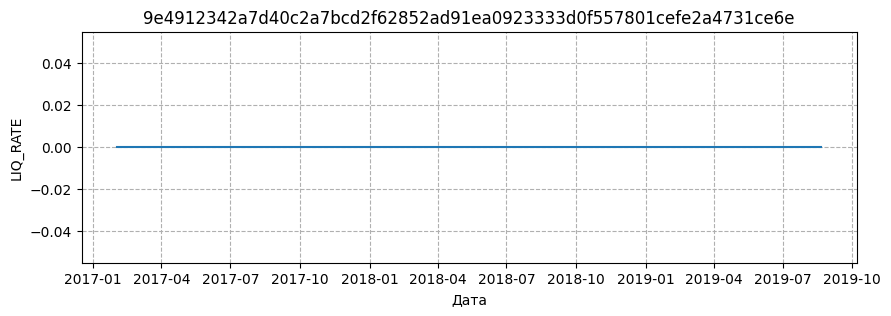

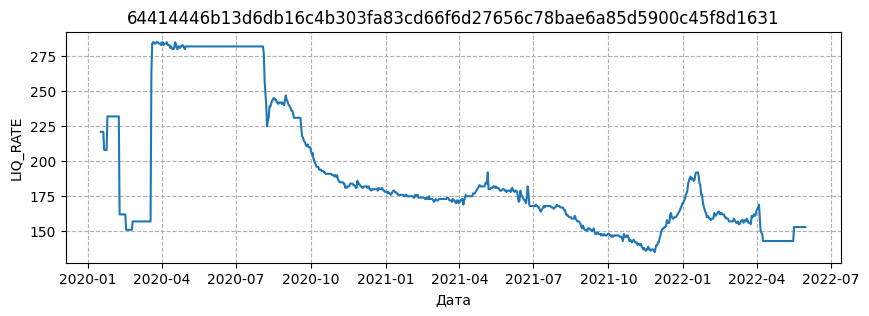

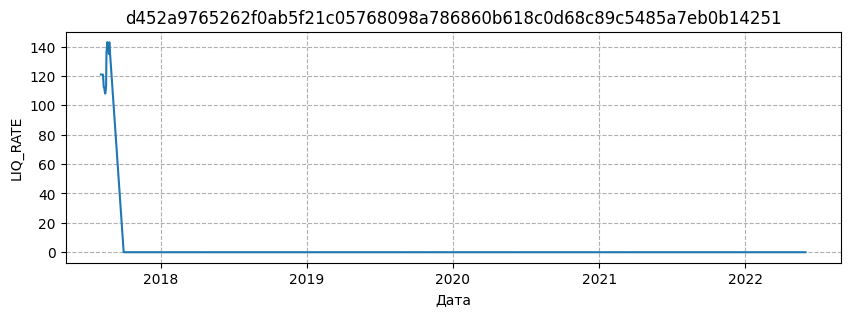

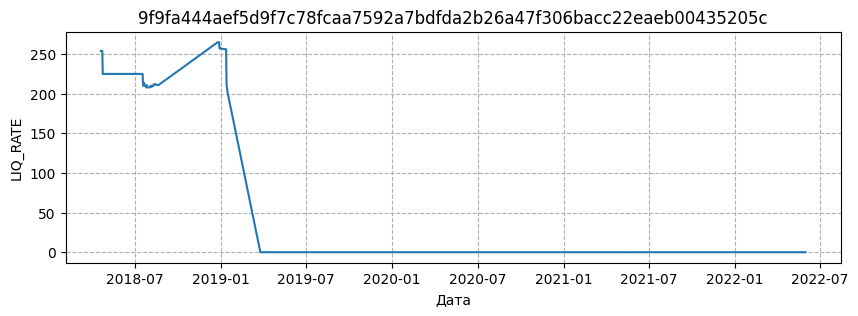

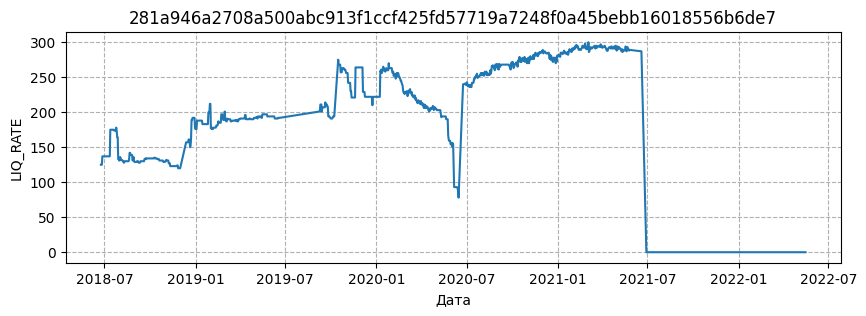

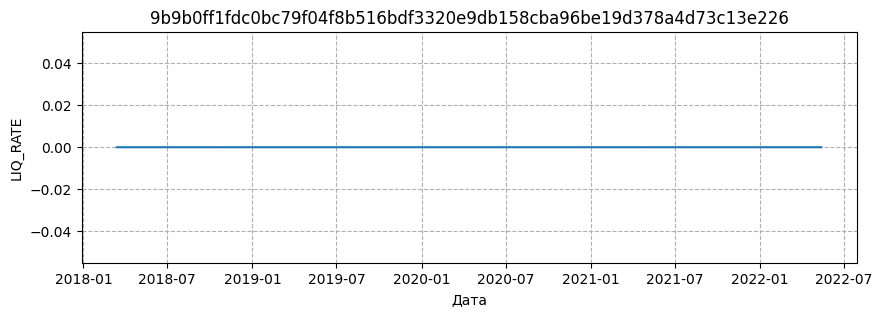

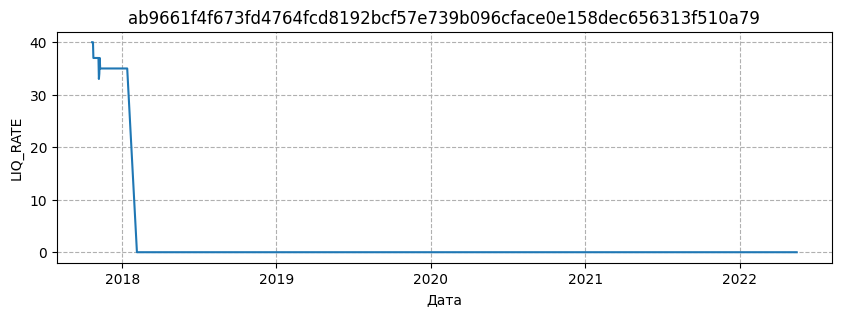

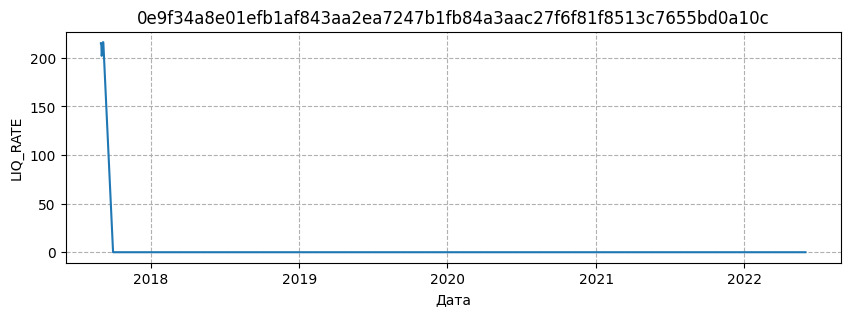

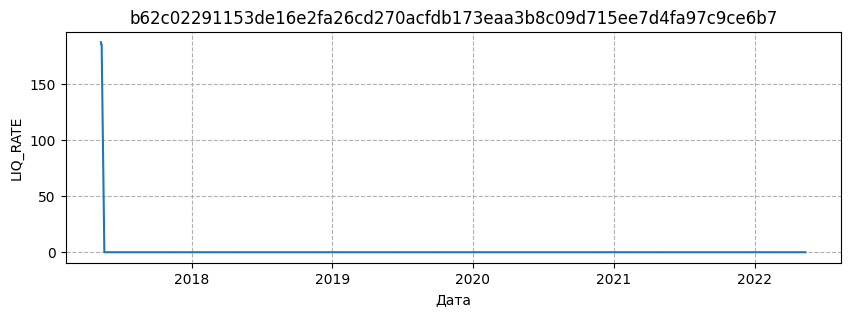

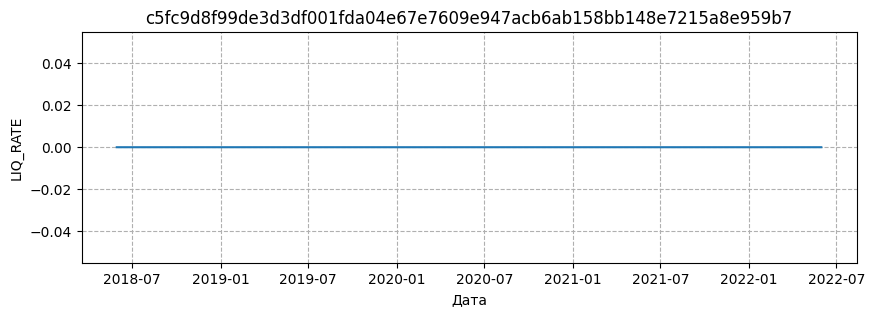

In [ ]:
# Коэффициент ликвидности скважин

param = "LIQ_RATE"

for well in df['WELL_NAME'].unique()[:10]:
    tmp = df[df['WELL_NAME'] == well]
    plt.figure(figsize=(10, 3))
    
    plt.plot(tmp["MEASURED_IN_DATE"], tmp[param])
    plt.grid(ls="--")
    plt.title(well)
    plt.xlabel("Дата")
    plt.ylabel(param)

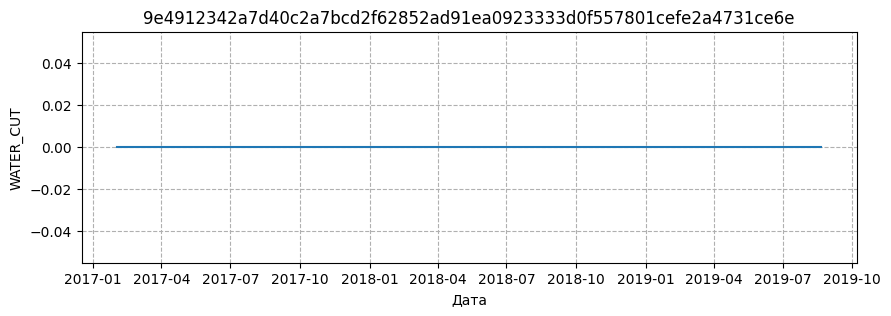

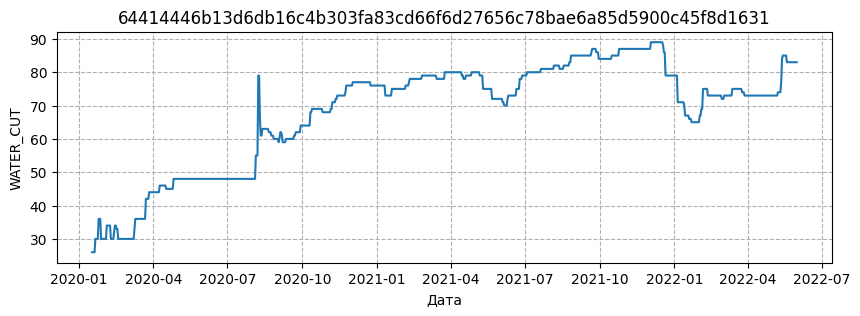

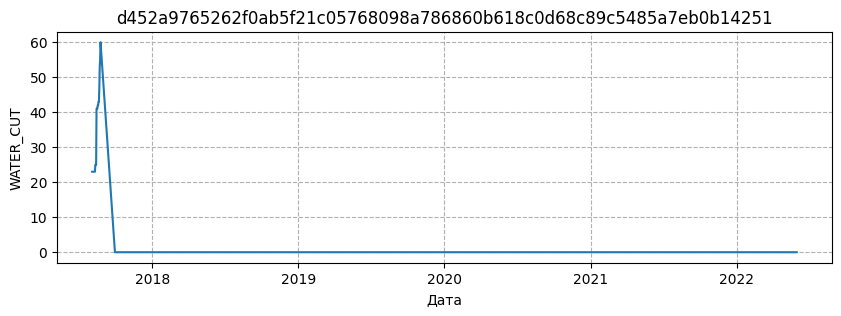

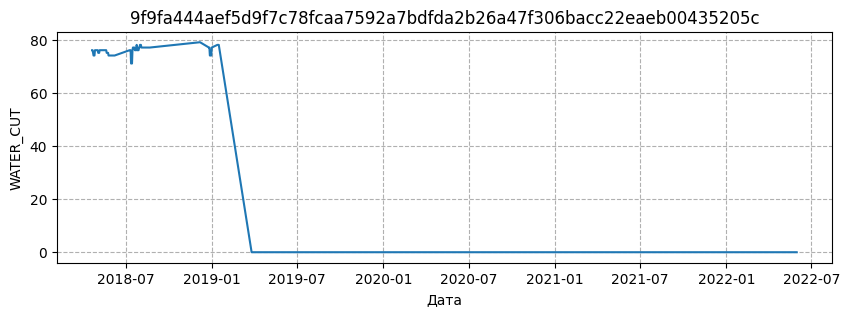

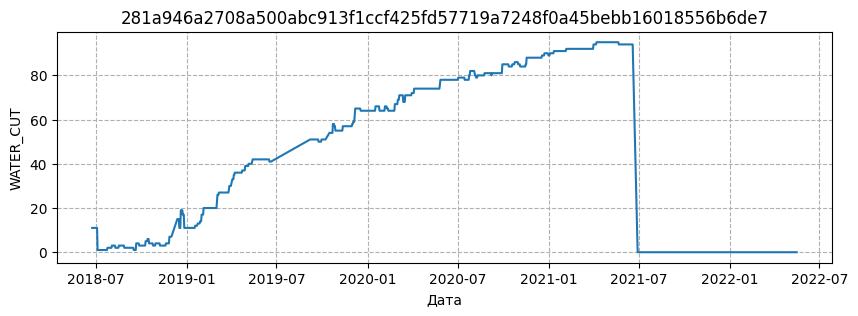

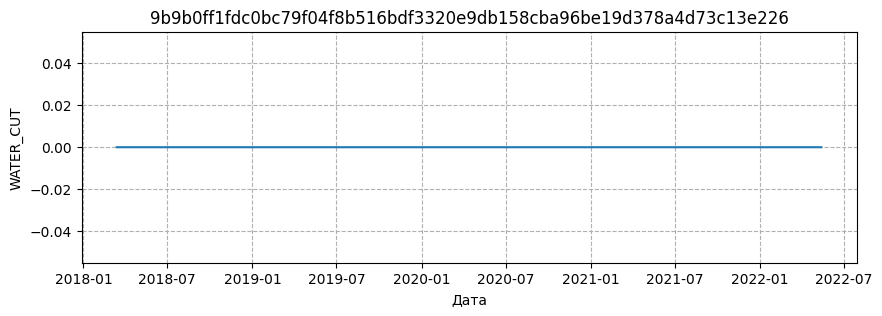

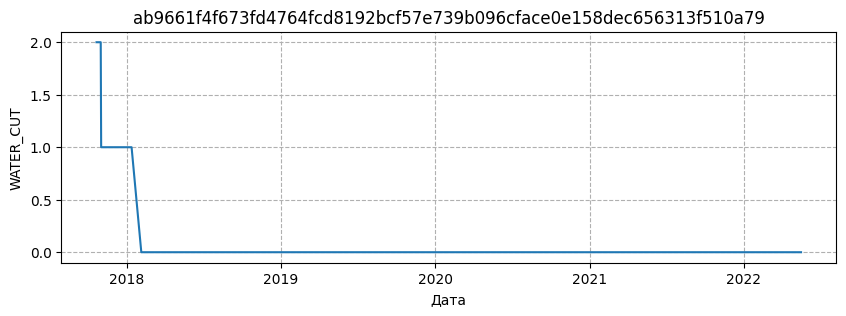

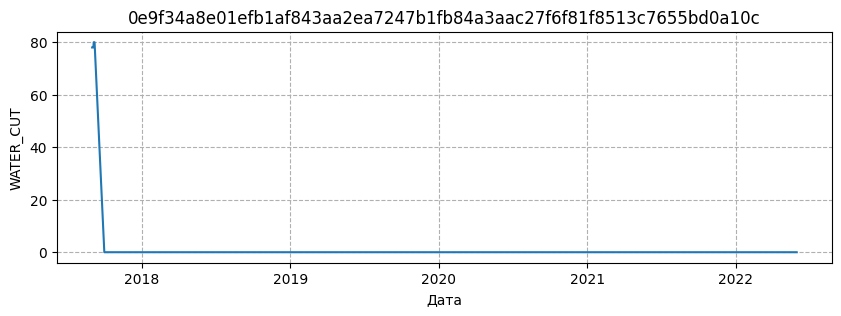

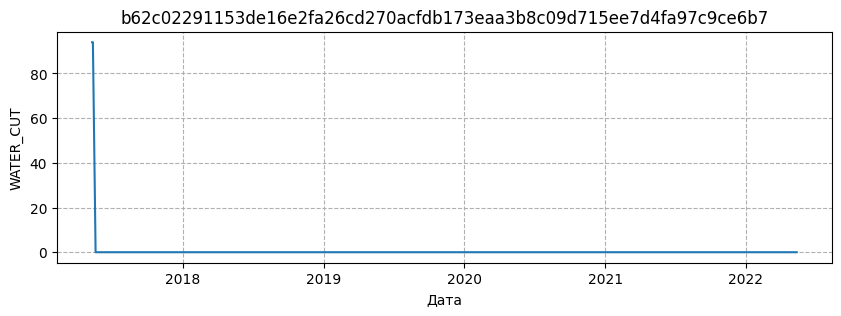

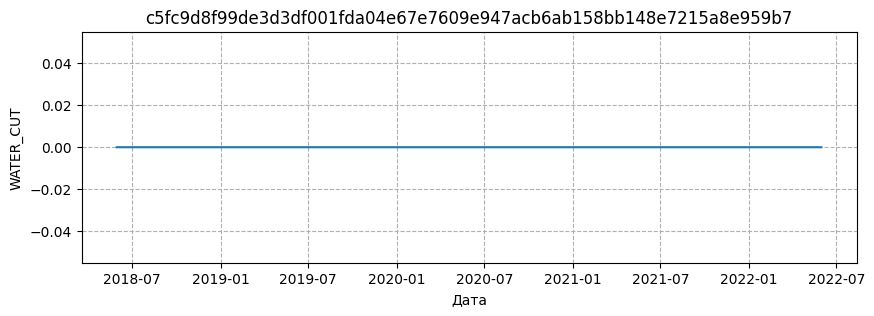

In [24]:
# Коэффициент ликвидности скважин

param = "WATER_CUT"

for well in df['WELL_NAME'].unique()[:10]:
    tmp = df[df['WELL_NAME'] == well]
    plt.figure(figsize=(10, 3))
    
    plt.plot(tmp["MEASURED_IN_DATE"], tmp[param])
    plt.grid(ls="--")
    plt.title(well)
    plt.xlabel("Дата")
    plt.ylabel(param)

In [25]:
# Добавление типа скважины

grouped_df = df.groupby(["WELL_NAME"], as_index=True).agg({"CHARWORK": ["unique"], "LIQ_RATE": ["unique"], "WATER_CUT": ["count"]})
grouped_df.columns = ["_".join(x).rstrip("_") for x in grouped_df.columns.ravel()]
grouped_df["CHARWORK_unique"] = [
    ",".join(map(str, l)) for l in grouped_df["CHARWORK_unique"]
]
grouped_df.head()

,CHARWORK_unique,LIQ_RATE_unique,WATER_CUT_count
WELL_NAME,,,
02567341ea1c840299c4a0b74a8cd59dff5b1dd2af69ddd253c0938443317eb8,"НЕФ,НАГ","[197.0, 196.0, 185.0, 117.0, 120.0, 116.0, 112...",766
0471418bf3f22977041f4016205e646cba1214e82e6d636d4f7abfe3eb00dbd9,НЕФ,"[477.0, 471.0, 468.0, 469.0, 479.0, 504.0, 502...",419
05e1e718d93d96a73e6ddb6a307fe5de60fc53249d760cd81b13a6e7255d708e,НЕФ,"[484.0, 472.0, 451.0, 450.0, 457.0, 446.0, 437...",441
06252c150957a6ca28111b094eb923bfa74d2a66928655e9cb7cb671ed159ecf,"НЕФ,НАГ","[101.0, 94.0, 96.0, 92.0, 91.0, 90.0, 89.0, 88...",1411
067468377b3cf69697d91de11e79d036135ceff0a601655e9f5c78bda3818b9c,НЕФ,"[468.0, 435.0, 434.0, 431.0, 428.0, 423.0, 437...",604


In [ ]:
df.groupby(
    [
        "WELL_NAME",
        "CHARWORK",
        "KCHARWORK",
    ],
    as_index=True,
).agg({"MEASURED_IN_DATE": ["count"]}).head()

MEASURED_IN_DATE
                                                                                 count
WELL_NAME                                          CHARWORK KCHARWORK                 
02567341ea1c840299c4a0b74a8cd59dff5b1dd2af69ddd... НАГ      20                     616
                                                   НЕФ      11                     150
0471418bf3f22977041f4016205e646cba1214e82e6d636... НЕФ      11                     419
05e1e718d93d96a73e6ddb6a307fe5de60fc53249d760cd... НЕФ      11                     441
06252c150957a6ca28111b094eb923bfa74d2a66928655e... НАГ      20                    1215

In [ ]:
# Получение координат скважин

def get_coords():
    df = pd.read_csv("./Data/waterflood-master/waterflood-master/data/train/coords.csv")
    print(df.shape)
    print(df["WELL_NAME"].nunique())
    return df

coords = get_coords()

coords = coords[coords["WELL_NAME"].isin(df["WELL_NAME"].unique())]
print(coords.shape)
print(coords["WELL_NAME"].nunique())

coords = pd.merge(coords, grouped_df, on="WELL_NAME", how="left")

display(coords.head())
display(coords.info())

(424, 5)
424
(266, 5)
266


,WELL_NAME,COORD_X,COORD_Y,X2,Y2,CHARWORK_unique
0,769384f0a6fe5cba75fc68a9e52395eb9b69fa8dab849e...,11611.72,3450.28,11769.95,2921.20,НЕФ
1,59e8ab92b257d0809933a49847143f08b2143d238856e8...,14147.72,4947.28,13926.47,5554.19,НЕФ
2,281a946a2708a500abc913f1ccf425fd57719a7248f0a4...,11009.72,8856.28,11029.73,8939.46,"НЕФ,НАГ"
3,6ab87d3e097b485c5bdd13b3940ec9c160fe5e77163d2e...,13982.72,6816.28,13947.17,6771.63,НАГ
4,488e60d7575cbd8757674c7e03a8a736a90a5d1245a4ce...,14170.72,6362.28,14229.18,6398.64,"НЕФ,НАГ"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WELL_NAME        266 non-null    object 
 1   COORD_X          266 non-null    float64
 2   COORD_Y          266 non-null    float64
 3   X2               266 non-null    float64
 4   Y2               266 non-null    float64
 5   CHARWORK_unique  266 non-null    object 
dtypes: float64(4), object(2)
memory usage: 12.6+ KB


None

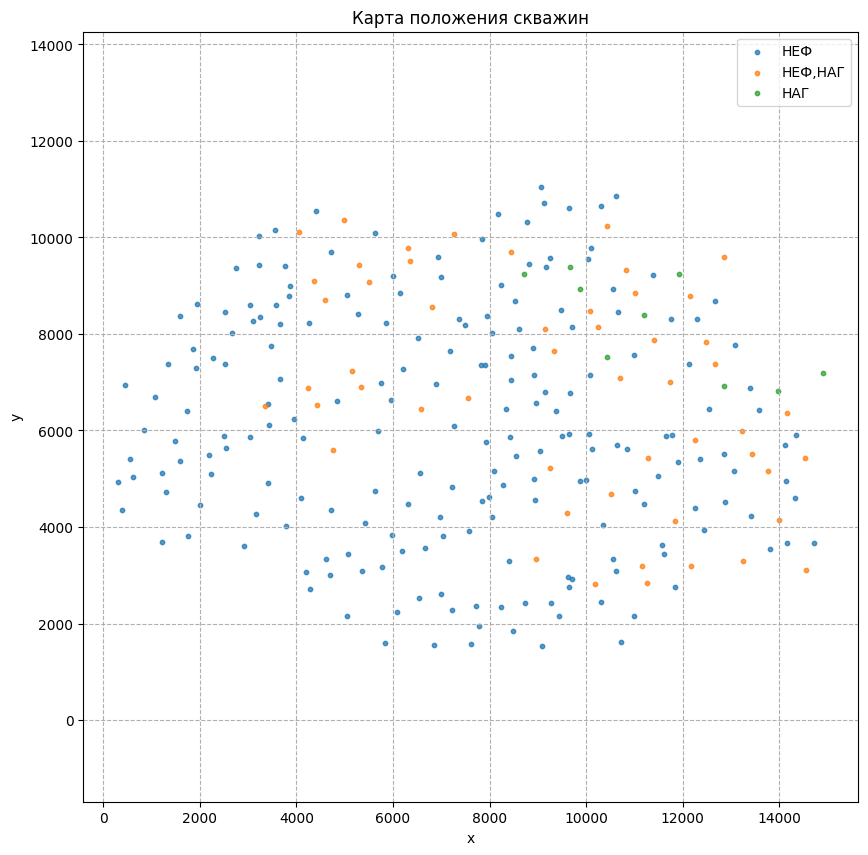

In [27]:
# Отображение скважин на карте


plt.figure(figsize=(10, 10))

for well_type in coords["CHARWORK_unique"].unique():
    tmp = coords[coords["CHARWORK_unique"] == well_type].copy()
    plt.scatter(
        tmp["COORD_X"],
        tmp["COORD_Y"],
        label = well_type,
        s = 10,
        alpha = 0.75
    )

#plt.scatter(coords["X2"], coords["Y2"], label="Выход из пласта", s = 5, alpha = 0.75)

plt.title("Карта положения скважин")
plt.axis("equal")
plt.grid(ls="--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [14]:
# Получение ГТМ скважин

def get_gtm():
    df = pd.read_csv("./Data/waterflood-master/waterflood-master/data/train/gtm.csv")
    df["START_DATE_FACT"] = pd.to_datetime(df["START_DATE_FACT"])
    df["END_DATE_FACT"] = pd.to_datetime(df["END_DATE_FACT"])
    
    print(df.shape)
    print(df['WELL_NAME'].nunique())
    
    return df

gtm = get_gtm()

gtm = gtm[gtm["WELL_NAME"].isin(df["WELL_NAME"].unique())]

print(gtm.shape)
print(gtm["WELL_NAME"].nunique())

display(gtm.head())
display(gtm.info())

(577, 4)
368
(417, 4)
266


,WELL_NAME,GEOTECH_ACTION,START_DATE_FACT,END_DATE_FACT
0,7f19ddcfcd2d874f2cf0dc982fccd173de21e99e87488f...,Из бурения,2020-10-03,2020-10-06
1,613f15a5a89a63c1f6e61ea5466461b46c8168e91c3293...,Из бурения,2020-07-01,2020-08-12
2,879329a0f238b019636f868a76bcbca2114b2b4135938f...,ИДН,2020-01-22,2020-01-28
3,a0cee26b395d55edbcc8ba5eb5f0c88d7b584ba2c5e318...,Из бурения,2020-11-14,2020-12-13
4,56deb052231234f854d9258f05d17ed2ad8727e2d6e63a...,Из бурения,2020-11-17,2020-12-13


<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 576
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   WELL_NAME        417 non-null    object        
 1   GEOTECH_ACTION   417 non-null    object        
 2   START_DATE_FACT  417 non-null    datetime64[ns]
 3   END_DATE_FACT    417 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 16.3+ KB


None

In [30]:
#Единые данные по скважинам

wells = pd.merge(coords, gtm, on="WELL_NAME", how="left")
wells = pd.merge(wells, df, on="WELL_NAME", how="left")
display(wells.head())
display(wells.info())

,WELL_NAME,COORD_X,COORD_Y,X2,Y2,CHARWORK_unique,GEOTECH_ACTION,START_DATE_FACT,END_DATE_FACT,MEASURED_IN_DATE,KCHARWORK,CHARWORK,MEASURED_IN,LIQ_RATE,WATER_CUT,P_ZAB,INTAKE,WELLHEAD_PRESSURE,IS_WORKING
0,769384f0a6fe5cba75fc68a9e52395eb9b69fa8dab849e...,11611.72,3450.28,11769.95,2921.2,НЕФ,Из бурения,2018-09-08,2018-09-10,2018-09-15,11,НЕФ,2018-09-15 11:40:00,550.0,20.0,113.80,0.0,NaN,True
1,769384f0a6fe5cba75fc68a9e52395eb9b69fa8dab849e...,11611.72,3450.28,11769.95,2921.2,НЕФ,Из бурения,2018-09-08,2018-09-10,2018-09-16,11,НЕФ,2018-09-16 00:00:00,550.0,20.0,113.80,0.0,NaN,True
2,769384f0a6fe5cba75fc68a9e52395eb9b69fa8dab849e...,11611.72,3450.28,11769.95,2921.2,НЕФ,Из бурения,2018-09-08,2018-09-10,2018-09-17,11,НЕФ,2018-09-17 00:00:00,536.0,20.0,107.10,0.0,NaN,True
3,769384f0a6fe5cba75fc68a9e52395eb9b69fa8dab849e...,11611.72,3450.28,11769.95,2921.2,НЕФ,Из бурения,2018-09-08,2018-09-10,2018-09-18,11,НЕФ,2018-09-18 00:00:00,539.0,10.0,106.58,0.0,NaN,True
4,769384f0a6fe5cba75fc68a9e52395eb9b69fa8dab849e...,11611.72,3450.28,11769.95,2921.2,НЕФ,Из бурения,2018-09-08,2018-09-10,2018-09-19,11,НЕФ,2018-09-19 00:00:00,539.0,10.0,103.17,0.0,NaN,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311156 entries, 0 to 311155
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   WELL_NAME          311156 non-null  object        
 1   COORD_X            311156 non-null  float64       
 2   COORD_Y            311156 non-null  float64       
 3   X2                 311156 non-null  float64       
 4   Y2                 311156 non-null  float64       
 5   CHARWORK_unique    311156 non-null  object        
 6   GEOTECH_ACTION     311156 non-null  object        
 7   START_DATE_FACT    311156 non-null  datetime64[ns]
 8   END_DATE_FACT      311156 non-null  datetime64[ns]
 9   MEASURED_IN_DATE   311156 non-null  datetime64[ns]
 10  KCHARWORK          311156 non-null  object        
 11  CHARWORK           311156 non-null  object        
 12  MEASURED_IN        311156 non-null  datetime64[ns]
 13  LIQ_RATE           311156 non-null  float64 

None

# Convert to CSV

In [31]:
wells.to_csv("./Data/wells.csv", index=False)